In [28]:
!pip install opencv-python
!pip install opencv-contrib-python
!pip install matplotlib

In [29]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
print(cv2.__version__)


4.4.0


In [31]:
images_dir = "./../data/images"
image_files = os.listdir(images_dir)
image_files

['bike.jpg',
 'bike1.jpg',
 'bike2.jpg',
 'bike3.jpg',
 'car.jpg',
 'car_1.jpg',
 'car_10.jpg',
 'car_2.jpg',
 'car_3.jpg',
 'car_4.jpg',
 'car_5.jpg',
 'car_6.jpg',
 'car_7.jpg',
 'car_8.jpg',
 'car_9.jpg']

In [32]:
image_path = "{}/{}".format(images_dir, "car.jpg")

In [33]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [34]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

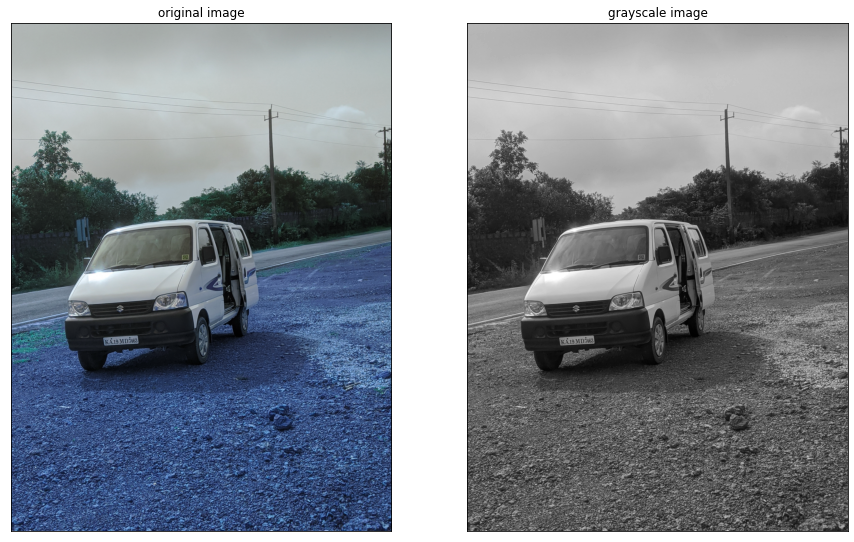

In [35]:
plot_images(image, gray,title1="original image",title2="grayscale image")

In [36]:
blur = cv2.bilateralFilter(image,9,75,75)

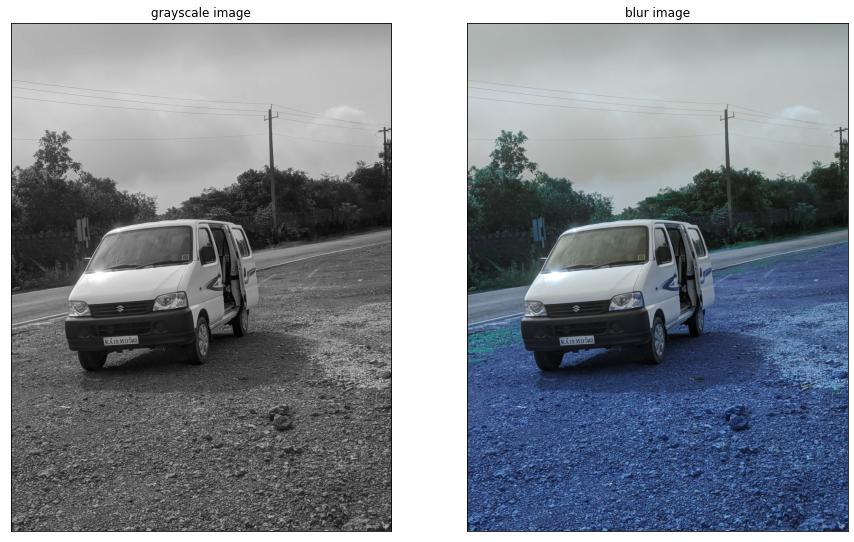

In [37]:
plot_images(gray, blur,title1="grayscale image",title2="blur image")

In [38]:
edges = cv2.Canny(blur, 170, 200)

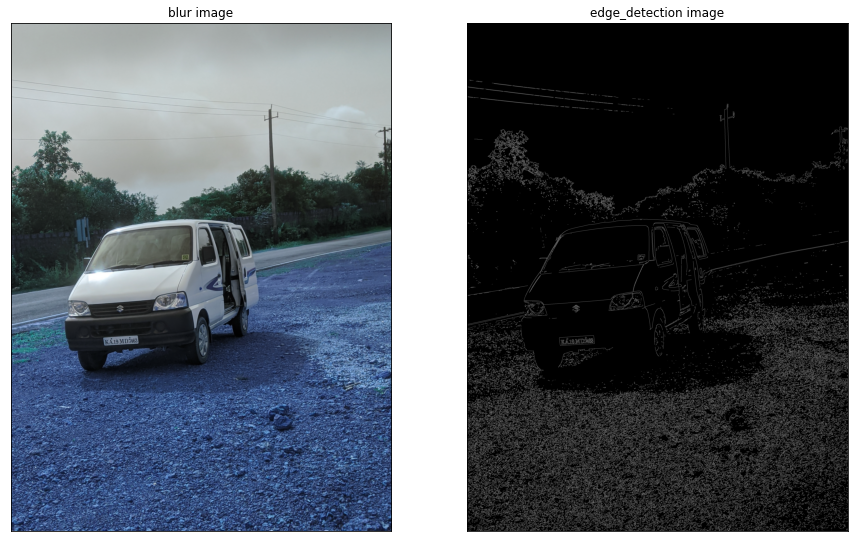

In [39]:
plot_images(blur, edges,title1="blur image",title2="edge_detection image")

In [40]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [41]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)
NumberPlateCount = None

In [42]:
image_copy = blur.copy()

In [43]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

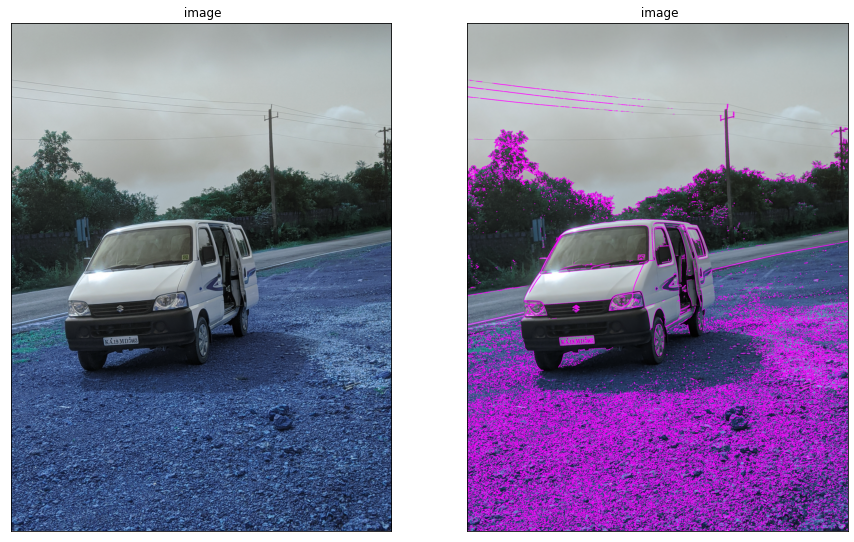

In [44]:
plot_images(image, image_copy,title1=" image",title2=" image")


In [45]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [46]:
image_copy = blur.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

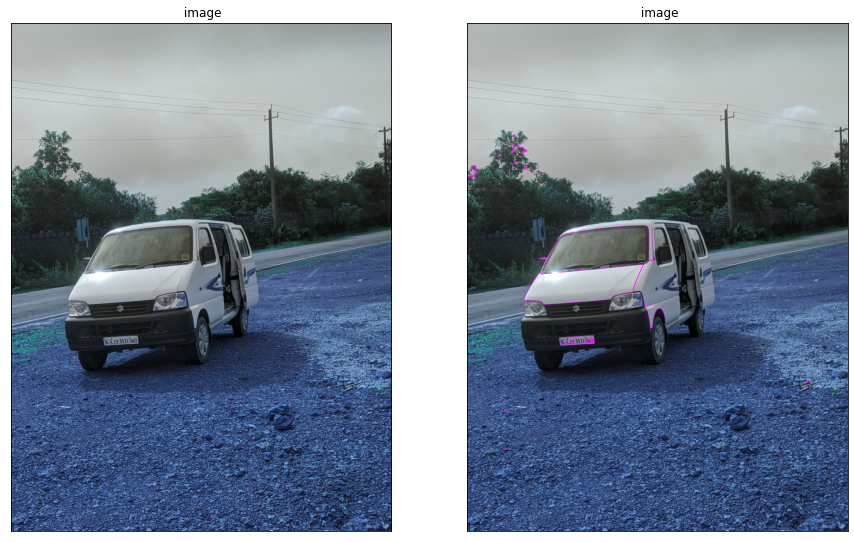

In [47]:
plot_images(image, image_copy,title1=" image",title2=" image")

In [48]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

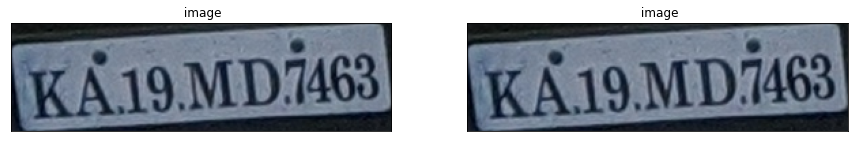

In [49]:
plot_images(plate, plate,title1=" image",title2=" image")